In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression as LR
from sklearn import metrics, datasets

In [8]:
X, y = datasets.load_diabetes(return_X_y=True)
X = X[:, 0]
print (X[:10])
print (y[:10])

[ 0.03807591 -0.00188202  0.08529891 -0.08906294  0.00538306 -0.09269548
 -0.04547248  0.06350368  0.04170844 -0.07090025]
[151.  75. 141. 206. 135.  97. 138.  63. 110. 310.]


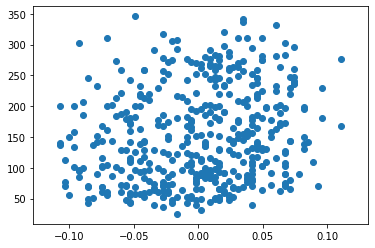

In [9]:
plt.scatter(X, y)

In [10]:
# Building the model
theta1 = 0
theta0 = 0
alpha = 0.0001
epochs = 20000
m = len(y)

# Gradient descent
for i in range(epochs):
    h = theta1 * X + theta0
    d_theta1 = (-2 / m) * sum(X * (y -  h))
    d_theta0 = (-2 / m) * sum(y - h)
    theta1 = theta1 - alpha * d_theta1
    theta0 = theta0 - alpha * d_theta0

In [11]:
print (theta0, theta1)

149.34817669855434 2.7403700576201353


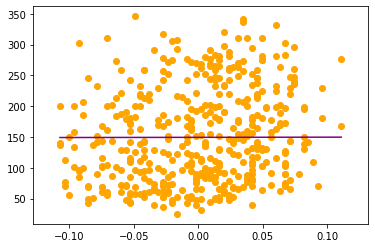

In [12]:
h = theta1 * X + theta0 
plt.scatter(X, y, c='orange')
plt.plot([min(X), max(X)], [min(h), max(h)], c='purple')

In [13]:
# Feature normalization/standardization

In [14]:
X = (X - X.mean()) / X.std()
print (X[:10])
print (y[:10])

[ 0.80050009 -0.03956713  1.79330681 -1.87244107  0.11317236 -1.94881082
 -0.9560041   1.33508832  0.87686984 -1.49059233]
[151.  75. 141. 206. 135.  97. 138.  63. 110. 310.]


In [15]:
# Building the model
theta1 = 0
theta0 = 0
alpha = 0.0001
epochs = 20000
m = len(y)

# Gradient descent
for i in range(epochs):
    h = theta1 * X + theta0
    d_theta1 = (-2 / m) * sum(X * (y -  h))
    d_theta0 = (-2 / m) * sum(y - h)
    theta1 = theta1 - alpha * d_theta1
    theta0 = theta0 - alpha * d_theta0

In [16]:
print (theta0, theta1)

149.3481766985543 14.203619316048348


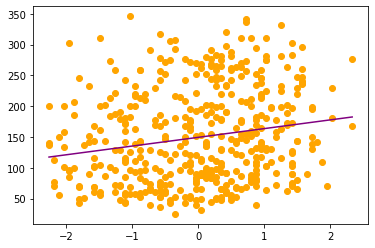

In [17]:
h = theta1 * X + theta0 
plt.scatter(X, y, c='orange')
plt.plot([min(X), max(X)], [min(h), max(h)], c='purple')

In [18]:
# Gradient descent multiple features

In [63]:
X, y = datasets.load_diabetes(return_X_y=True)
# X = (X - X.mean()) / X.std()

In [69]:
m = X.shape[0]
n = X.shape[1]
print (m, n)

442 10


In [67]:
print (X.shape, y.shape)

(442, 10) (442,)


In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=5)

In [49]:
reg = LR()
reg.fit(X_train, y_train)
print (reg.coef_)

[  0.12947036 -12.17410625  24.86870662  16.79538428 -39.36420136
  25.84337847   5.51444653  10.21170362  33.05501758   1.55684943]


In [50]:
y_predict = reg.predict(X_test)

In [51]:
metrics.mean_squared_error(y_test, y_predict)

2981.5854714667616

In [52]:
# Multiple features gradient descent

In [53]:
X, y = datasets.load_diabetes(return_X_y=True)

In [54]:
print (X.shape, y.shape)

(442, 10) (442,)


In [55]:
def hypothesis(theta, X, features):
    h = np.ones((X.shape[0], 1))
    theta = theta.reshape(1, features + 1)
    for i in range(X.shape[0]):
        h[i] = float(np.matmul(theta, X[i]))
    h = h.reshape(X.shape[0])
    return h

In [56]:
def gradient_descent(theta, alpha, epochs, h, X, y, features):
    loss = np.ones(epochs)
    for i in range(epochs):
        theta[0] = theta[0] - (alpha / X.shape[0]) * sum(h - y)
        for j in range(1, features + 1):
            theta[j] = theta[j] - (alpha / X.shape[0]) * sum((h - y) * X.transpose()[j])
        h = hypothesis(theta, X, features)
        loss[i] = (1 / (2 * X.shape[0])) * sum(np.square(h - y))
    theta = theta.reshape(1, features + 1)
    return theta, loss

In [57]:
def linear_regression(X, y, alpha, epochs):
    features = X.shape[1]
    X = np.concatenate((np.ones((X.shape[0], 1)), X), axis = 1)
    theta = np.zeros(features + 1)
    h = hypothesis(theta, X, features)
    theta, loss = gradient_descent(theta, alpha, epochs, h, X, y, features)
    return theta, loss

In [58]:
theta, loss = linear_regression(X_train, y_train, 0.0001, 35000)
print ('Theta : {}\nLoss : {}'.format(theta, loss))

Theta : [[147.39013305   1.97239933 -12.0718021   24.97433898  15.86281401
   -2.5860921   -4.04144265 -10.46125647   6.40621432  17.87758822
    2.55421489]]
Loss : [14260.74861093 14257.85214875 14254.95650547 ...  1447.66223861
  1447.65985756  1447.65747696]


In [61]:
n_iterations = [x for x in range(35000)]

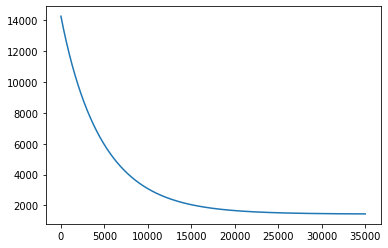

In [62]:
plt.plot(n_iterations, loss)